In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
# Максимальное количество слов
num_words = 5000
# Максимальная длина новости
max_news_len = 50
# Количество классов новостей
nb_classes = 15

In [41]:
train = pd.read_csv('actionsNPCDataSet/trainActions.csv',
                    header=None,
                    names=['class', 'text'])

In [42]:
train

,class,text
0,1,I'd like to know more about your interpersonal...
1,9,We should incorporate sparring into our fist f...
2,3,What is the end goal of our current mission?
3,10,Can you please use your healing herbs?
4,6,We should spend some time training with swords.
...,...,...
7046,7,Start your axe technique training.
7047,14,Use a buffer overflow attack to bypass the loc...
7048,7,Let's improve our axe fighting with some dedic...
7049,5,What kind of feedback loops should I have in p...


In [43]:
actions = train['text']

In [44]:
actions[:10]

0    I'd like to know more about your interpersonal...
1    We should incorporate sparring into our fist f...
2         What is the end goal of our current mission?
3               Can you please use your healing herbs?
4      We should spend some time training with swords.
5    Is there a way to fight effectively with littl...
6    Share your story of overcoming self-doubt and ...
7           Do you want to exchange equipment with me?
8            Let's work on your sword fighting skills.
9    Describe the moments that have taught you the ...
Name: text, dtype: object

In [45]:
y_train = utils.to_categorical(train['class'] - 1, nb_classes)

In [46]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [47]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(actions)

In [48]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'you': 3,
 'and': 4,
 'a': 5,
 'your': 6,
 'of': 7,
 'can': 8,
 'in': 9,
 'what': 10,
 'i': 11,
 'our': 12,
 'with': 13,
 "let's": 14,
 'how': 15,
 'this': 16,
 'for': 17,
 'me': 18,
 'is': 19,
 'training': 20,
 'do': 21,
 'on': 22,
 'are': 23,
 'about': 24,
 'we': 25,
 'some': 26,
 'task': 27,
 'axe': 28,
 'mace': 29,
 'that': 30,
 'sword': 31,
 'fight': 32,
 'time': 33,
 'world': 34,
 'have': 35,
 'combat': 36,
 'use': 37,
 'my': 38,
 'fighting': 39,
 'any': 40,
 'tell': 41,
 'current': 42,
 'need': 43,
 'practice': 44,
 'fist': 45,
 'skills': 46,
 'be': 47,
 'mission': 48,
 'lock': 49,
 'get': 50,
 'work': 51,
 'start': 52,
 'or': 53,
 'close': 54,
 'when': 55,
 'train': 56,
 'like': 57,
 'resources': 58,
 'place': 59,
 'take': 60,
 'think': 61,
 'area': 62,
 'completing': 63,
 'would': 64,
 'it': 65,
 'complete': 66,
 'want': 67,
 'techniques': 68,
 'improve': 69,
 "don't": 70,
 'an': 71,
 'sparring': 72,
 'see': 73,
 'ranged': 74,
 'from': 75,
 'exchange': 76

In [49]:
sequences = tokenizer.texts_to_sequences(actions)

In [50]:
index = 1
print(actions[index])
print(sequences[index])

We should incorporate sparring into our fist fight training.
[25, 77, 321, 72, 100, 12, 45, 32, 20]


In [51]:
x_train = pad_sequences(sequences, maxlen=max_news_len)

In [52]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  279,   57,    1,  205,   90,   24,    6, 1375,   46,
           8,    3,   41,   18,   24,    5,   33,   55,    3,  164, 1376,
          13,  355,   75,    5,   79, 1033],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   25,   77,  321,
          72,  100,   12,   45,   32,   20],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   10,   19,    2,
         312,  209,   

In [113]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_news_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(15, activation='softmax'))

In [54]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [55]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 32)            160000    
                                                                 
 conv1d_2 (Conv1D)           (None, 46, 250)           40250     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 250)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               32128     
                                                                 
 dense_5 (Dense)             (None, 15)                1935      
                                                                 
Total params: 234,313
Trainable params: 234,313
Non-trainable params: 0
________________________________________________

In [56]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path,
                                          monitor='val_accuracy',
                                          save_best_only=True,
                                          verbose=1)

In [57]:
history_cnn = model_cnn.fit(x_train,
                            y_train,
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
49/50 [============================>.] - ETA: 0s - loss: 2.5164 - accuracy: 0.2468
Epoch 1: val_accuracy improved from -inf to 0.44334, saving model to best_model_cnn.h5
50/50 [==============================] - 4s 48ms/step - loss: 2.5103 - accuracy: 0.2500 - val_loss: 1.9623 - val_accuracy: 0.4433
Epoch 2/5
49/50 [============================>.] - ETA: 0s - loss: 1.0004 - accuracy: 0.7918
Epoch 2: val_accuracy improved from 0.44334 to 0.92776, saving model to best_model_cnn.h5
50/50 [==============================] - 2s 39ms/step - loss: 0.9930 - accuracy: 0.7931 - val_loss: 0.3434 - val_accuracy: 0.9278
Epoch 3/5
49/50 [============================>.] - ETA: 0s - loss: 0.1545 - accuracy: 0.9708
Epoch 3: val_accuracy improved from 0.92776 to 0.96884, saving model to best_model_cnn.h5
50/50 [==============================] - 2s 36ms/step - loss: 0.1535 - accuracy: 0.9708 - val_loss: 0.1214 - val_accuracy: 0.9688
Epoch 4/5
49/50 [============================>.] - ETA: 0s - los

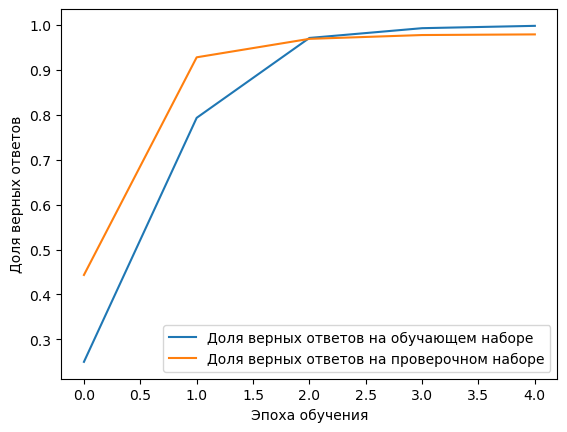

In [58]:
plt.plot(history_cnn.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [59]:
model_cnn.load_weights(model_cnn_save_path)

In [108]:
text = "Can you open this door?"

In [109]:
sequence = tokenizer.texts_to_sequences([text])

In [110]:
data = pad_sequences(sequence, maxlen=max_news_len)

In [111]:
result = model_cnn.predict(data)

1/1 [==============================] - 0s 42ms/step


In [112]:
np.argmax(result) + 1

14

In [65]:
test = pd.read_csv('actionsNPCDataSet/actionsTest.csv',
                    header=None,
                    names=['class', 'text'])

In [66]:
actionsTest = test['text']

In [67]:
testSequences = tokenizer.texts_to_sequences(actionsTest)

In [68]:
x_test = pad_sequences(testSequences, maxlen=max_news_len)

In [69]:
y_test= utils.to_categorical(test['class'] - 1, nb_classes)

In [70]:
model_cnn.evaluate(x_test, y_test, verbose=1)

44/44 [==============================] - 0s 6ms/step - loss: 0.0620 - accuracy: 0.9886


[0.061995163559913635, 0.9885714054107666]